In [19]:
import numpy as np
import matplotlib.pyplot as plt

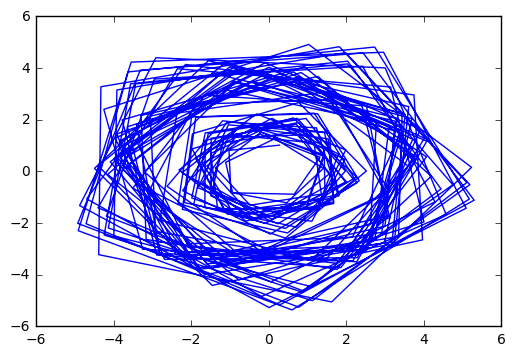

In [20]:
# Hamiltonian dynaimcs with noised gradient
m = 1
C = 3
dt = 0.1
nstep = 300
niter  = 50
# noise in the gradient
sigma = 0.5

gradUPerfect = lambda x: x
gradU = lambda x: x + np.random.randn(1) * sigma

xstart = np.ones((1, 1))
pstart = np.zeros((1, 1))

x = xstart
p = pstart
xs = np.zeros((nstep, 1))
ys = np.zeros((nstep, 1))
for i in range(nstep):
    for j in range(niter):
        p = p - gradU(x) * dt/2
        x = x + p/m * dt
        p = p - gradU(x) * dt/2
    xs[i] = x
    ys[i] = p

plt.plot(xs, ys)

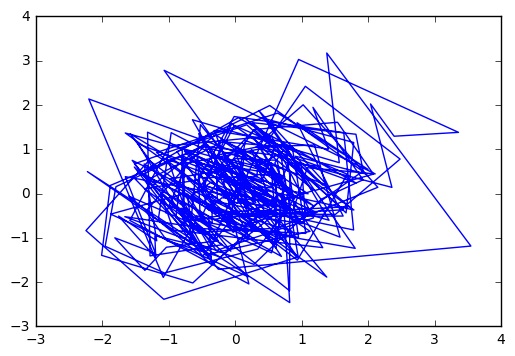

In [21]:
# Hamiltonian dynaimcs with noised gradient
x = xstart
p = pstart
xs = np.zeros((nstep, 1))
ys = np.zeros((nstep, 1))
for i in range(nstep):
    p = np.random.randn(len(x)) * np.sqrt(m)
    for j in range(niter):
        p = p - gradU(x) * dt/2
        x = x + p/m * dt
        p = p - gradU(x) * dt/2
    xs[i] = x
    ys[i] = p

plt.plot(xs, ys)

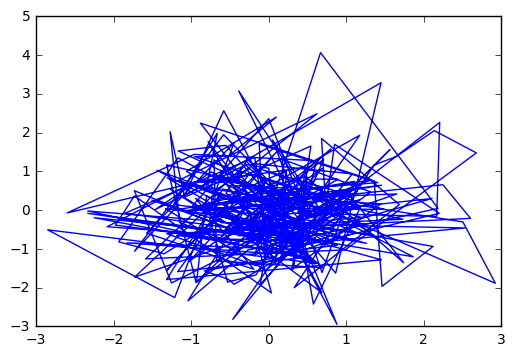

In [23]:
# Second order Langevin dynamics with noised gradient
x = xstart
p = pstart
xs = np.zeros((nstep, 1))
ys = np.zeros((nstep, 1))
Bhat = 0.5 * np.power(sigma, 2) * dt
D = np.sqrt(2 * (C - Bhat) * dt)
for i in range(nstep):
    for j in range(niter):
        p = p - gradU(x) * dt - p * C * dt + np.random.randn(1) * D
        x = x + p/m * dt
    xs[i] = x
    ys[i] = p

plt.plot(xs, ys)

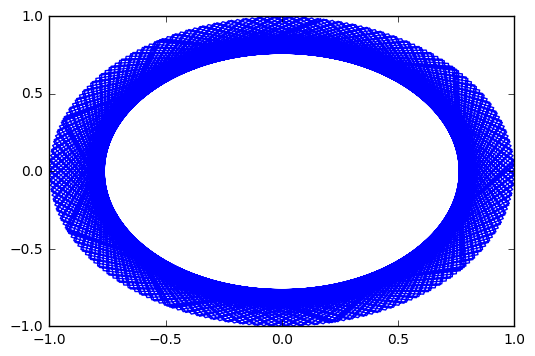

In [24]:
x = xstart
p = pstart
xs = np.zeros((nstep, 1))
ys = np.zeros((nstep, 1))
for i in range(nstep):
    for j in range(nstep):
        p = p - gradUPerfect(x) * dt / 2
        x = x + p/m * dt
        p = p -gradUPerfect(x) * dt / 2
    xs[i] = x
    ys[i] = p
plt.plot(xs, ys)